Default hyperparameters:
Cross validation R2 train scores:  [0.75438708 0.76966062 0.77010205 0.78047411 0.7708067  0.79420313
 0.78691365 0.78729138 0.75542937 0.76805353]
Cross validation R2 test scores:  [-0.18692911  0.53008946  0.3366926   0.50869432  0.59539296  0.37214553
  0.17647115  0.38168244  0.45503471  0.25637301]
Cross validation root mean squared error train scores:  [44.94629818 44.31862163 44.06926258 43.02324967 44.43365362 41.21061498
 43.10519379 42.62871767 42.84836065 41.45635705]
Cross validation root mean squared error test scores:  [70.54828697 47.15796099 67.1595918  54.54009993 45.11924908 69.87964964
 58.56172245 60.90875591 78.61268798 79.27098415]


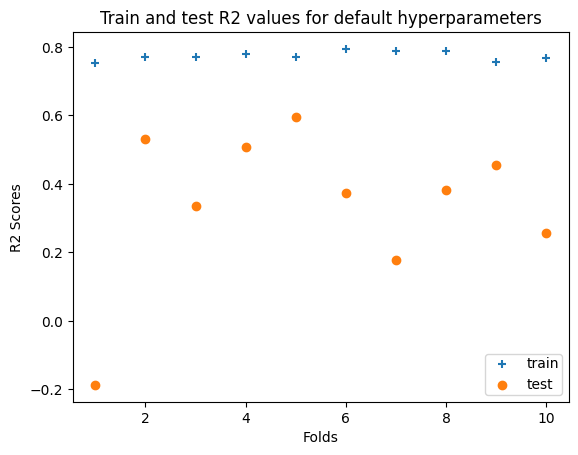

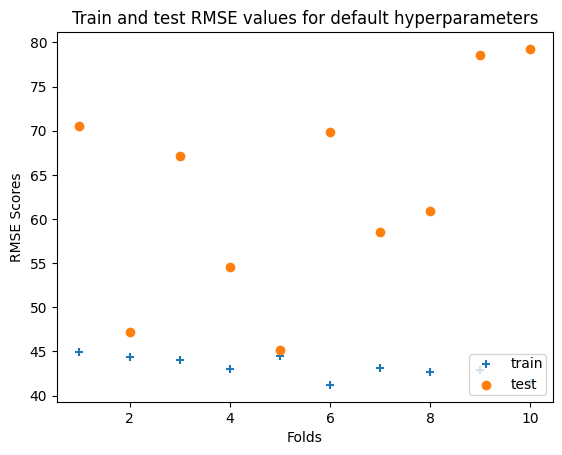

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
# column names for independent features
independent_columns = [
    "normalising_temperature", 
    "tempering_temperature",
    "percent_silicon",
    "percent_chromium",
    "percent_copper",
    "percent_nickel",
    "percent_sulphur",
    "percent_carbon",
    "percent_manganese"
]
# column names for the target variable
dependent_column = "tensile_strength"
# Read steel.csv file into steel_data
steel_data = pd.read_csv("steel.csv")
# independent features on x-axis, target value on y-axis
x_independent = steel_data.loc[:,independent_columns]
y_target_value = steel_data.loc[:,dependent_column]


# List of K values from 1 - 31 in jumps of 2
k_values = list(range(3,33,3))
# P_values are used for changing the distance weighting scheme, the default weighting scheme is of KNN regressor is Minkowiski 
# when it is supplied with p = 1 it behaves like Manhattan weighitng scheme and when p = 2 it behaves like Euclidean weighting scheme
p_values = [
    1, 
    1.5,
    2
]

# Helper list for the number of folds
folds = list(range(1,11))


weighting_scheme_names = [
    "Euclidean",
    "Minkowski",
    "Manhattan"
]

r2_values_defalut_train = []
r2_values_defalut_test = []
rmse_values_default_train = []
rmse_values_default_test = []
# KNeighboursRegressor run with default hyperparameters trained with 10 fold cross validation
print("Default hyperparameters:")
# get the R2 metrics scores
kNNRegressor = KNeighborsRegressor()
cross_validation_scores = cross_validate(kNNRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="r2")
r2_values_defalut_train = cross_validation_scores["train_score"]
r2_values_defalut_test = cross_validation_scores["test_score"]
print("Cross validation R2 train scores: ", r2_values_defalut_train)
print("Cross validation R2 test scores: ", r2_values_defalut_test)
# get the mean squared error metrics scores and covert them to root mean squared error
cross_validation_scores = cross_validate(kNNRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
rmse_values_default_train = np.sqrt(np.abs(cross_validation_scores["train_score"]))
rmse_values_default_test = np.sqrt(np.abs(cross_validation_scores["test_score"]))
print("Cross validation root mean squared error train scores: ", rmse_values_default_train)
print("Cross validation root mean squared error test scores: ", rmse_values_default_test)

# Plot r2 values for the default hyperparameter selection for train and test data
plt.title("Train and test R2 values for default hyperparameters")
plt.scatter(folds,r2_values_defalut_train,marker="+")
plt.scatter(folds,r2_values_defalut_test,marker="o")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Folds")
plt.ylabel("R2 Scores")
plt.show()

# Plot rmse values for the default hyperparameter selection for train and test data
plt.title("Train and test RMSE values for default hyperparameters")
plt.scatter(folds,rmse_values_default_train,marker="+")
plt.scatter(folds,rmse_values_default_test,marker="o")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Folds")
plt.ylabel("RMSE Scores")
plt.show()

testing the algorithm behaviour with default K-value but changing the weighting scheme


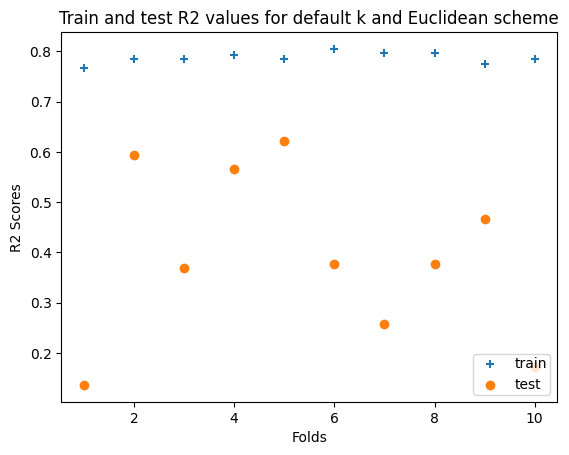

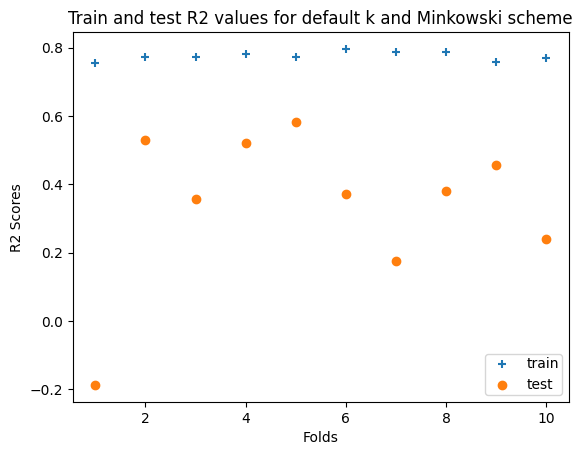

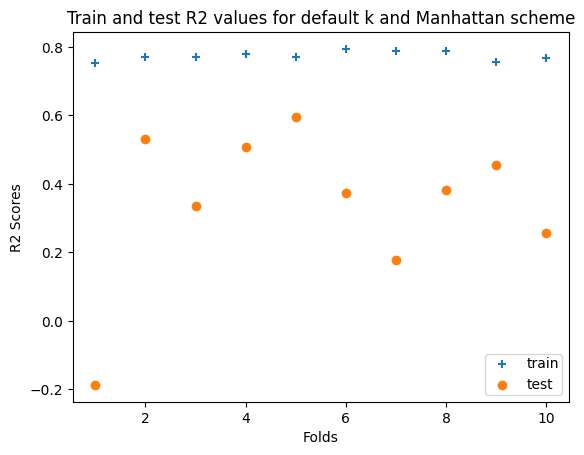

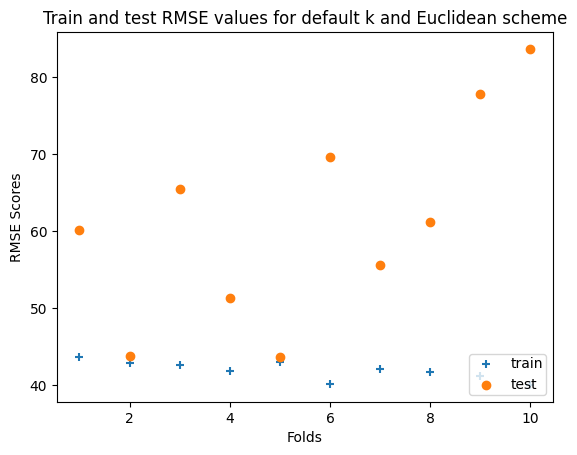

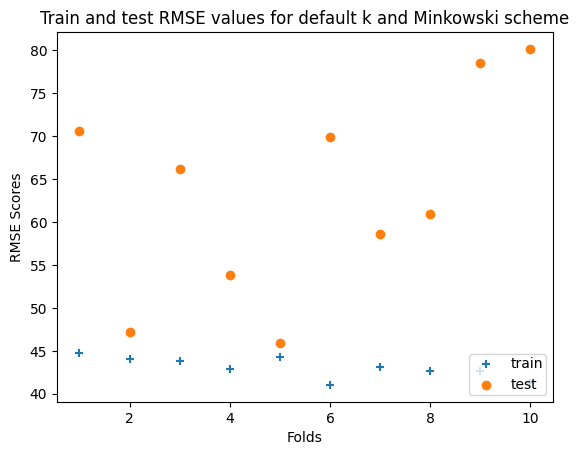

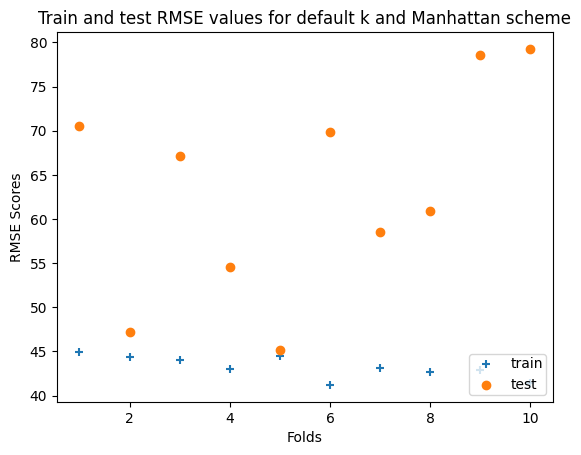

Testing the algorithm behaviour with default weighting scheme but changing the K-value
R2 Scores for the training with default weighting scheme but chaniging K-Value:  [array([0.81525802, 0.82816865, 0.82984294, 0.83529038, 0.8265584 ,
       0.85036438, 0.83772128, 0.83697191, 0.80915444, 0.83126343]), array([0.73574259, 0.75168688, 0.75001783, 0.76199421, 0.75700707,
       0.77523148, 0.76710748, 0.77054957, 0.73655114, 0.74644938]), array([0.68403745, 0.70330809, 0.69901283, 0.71059266, 0.70938511,
       0.72727986, 0.7143256 , 0.71675234, 0.6986221 , 0.69198839]), array([0.64868542, 0.67085801, 0.66850097, 0.67610112, 0.67560873,
       0.69431756, 0.68334873, 0.68517644, 0.6696719 , 0.65111999]), array([0.64318255, 0.66447349, 0.66214563, 0.66918205, 0.6677568 ,
       0.68783652, 0.67987628, 0.67452819, 0.65544669, 0.64277222]), array([0.63724577, 0.65942538, 0.65892805, 0.66551099, 0.66283333,
       0.68472692, 0.67288682, 0.66744046, 0.64782091, 0.63922148]), array([0.625558

In [2]:
print("testing the algorithm behaviour with default K-value but changing the weighting scheme")
default_k_value_r2_train_values = []
default_k_value_r2_test_values = []
default_k_value_rmse_train_values = []
default_k_value_rmse_test_values = []
# use 10 - fold cv and train the knn regressor with different weighting schemes but keeping the k-value at default 
for i in range(len(p_values)):
        kNNRegressor = KNeighborsRegressor(p=p_values[i])
        cross_validation_scores = cross_validate(kNNRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="r2")
        default_k_value_r2_train_values.append(cross_validation_scores["train_score"])
        default_k_value_r2_test_values.append(cross_validation_scores["test_score"])
        # get the mean squared error metrics scores and covert them to root mean squared error
        cross_validation_scores = cross_validate(kNNRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
        default_k_value_rmse_train_values.append(np.sqrt(np.abs(cross_validation_scores["train_score"])))
        default_k_value_rmse_test_values.append(np.sqrt(np.abs(cross_validation_scores["test_score"])))

# plot a scatter plot of the r2 values over 10 folds for each of the model trained above
for i in range(len(p_values)):        
    plt.title("Train and test R2 values for default k and "+ weighting_scheme_names[i] + " scheme")
    plt.scatter(folds,default_k_value_r2_train_values[i],marker="+")
    plt.scatter(folds,default_k_value_r2_test_values[i],marker="o")
    legend_labels = ["train","test"]
    plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
    plt.xlabel("Folds")
    plt.ylabel("R2 Scores")
    plt.show()        
        

# plot a scatter plot of the r2 values over 10 folds for each of the model trained above
for i in range(len(p_values)):        
    plt.title("Train and test RMSE values for default k and "+ weighting_scheme_names[i] + " scheme")
    plt.scatter(folds,default_k_value_rmse_train_values[i],marker="+")
    plt.scatter(folds,default_k_value_rmse_test_values[i],marker="o")
    legend_labels = ["train","test"]
    plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
    plt.xlabel("Folds")
    plt.ylabel("RMSE Scores")
    plt.show()  

print("Testing the algorithm behaviour with default weighting scheme but changing the K-value")
default_weighting_scheme_r2_train_values = []
default_weighting_scheme_r2_test_values = []
default_weighting_scheme_rmse_train_values = []
default_weighting_scheme_rmse_test_values = []
# use 10 - fold cv and train the knn regressor with different weighting schemes but keeping the k-value at default 
for i in range(len(k_values)):
    kNNRegressor = KNeighborsRegressor(n_neighbors=k_values[i])
    cross_validation_scores = cross_validate(kNNRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="r2")
    default_weighting_scheme_r2_train_values.append(cross_validation_scores["train_score"])
    default_weighting_scheme_r2_test_values.append(cross_validation_scores["test_score"])
    # get the mean squared error metrics scores and covert them to root mean squared error
    cross_validation_scores = cross_validate(kNNRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
    default_weighting_scheme_rmse_train_values.append(np.sqrt(np.abs(cross_validation_scores["train_score"])))
    default_weighting_scheme_rmse_test_values.append(np.sqrt(np.abs(cross_validation_scores["test_score"])))

# print out the r2 and rmse values
print("R2 Scores for the training with default weighting scheme but chaniging K-Value: ", default_weighting_scheme_r2_train_values)
print("R2 Scores for the test with default weighting scheme but chaniging K-Value: ", default_weighting_scheme_r2_test_values)
print("RMSE Scores for the training with default weighting scheme but chaniging K-Value: ", default_weighting_scheme_rmse_train_values)
print("RMSE Scores for the test with default weighting scheme but chaniging K-Value: ", default_weighting_scheme_rmse_test_values)



In [3]:
print("Range of K-values for each model apart from default is: ", k_values)
# lists of scores and models
list_of_r2_scores_train = []
list_of_r2_scores_test = []
list_of_rmse_scores_train = []
list_of_rmse_scores_test = []


for i in range(len(p_values)):
    for j in range(len(k_values)):
        # define the kNN Regressor with its hyperparameters for different k-neighbours and different weighting schemes
        kNNRegressor = KNeighborsRegressor(n_neighbors=k_values[j], p=p_values[i])
        # get the the average value of all ten folds for this model
        cross_validation_scores = cross_validate(kNNRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="r2")
        list_of_r2_scores_train.append(cross_validation_scores["train_score"].mean())
        list_of_r2_scores_test.append(cross_validation_scores["test_score"].mean())
        # get the the average value of all ten folds for this model get the mean squared error metrics scores  of these average values and covert these to root mean squared error
        cross_validation_scores = cross_validate(kNNRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
        list_of_rmse_scores_train.append(np.sqrt(np.abs(cross_validation_scores["train_score"].mean())))
        list_of_rmse_scores_test.append(np.sqrt(np.abs(cross_validation_scores["test_score"].mean())))

# Split each list so that it contains three sublists each sublits representing a different weighting scheme with mean values of the 10 - fold CV for every K value
list_of_r2_scores_train = np.array_split(list_of_r2_scores_train, 3)
list_of_r2_scores_test = np.array_split(list_of_r2_scores_test, 3)
list_of_rmse_scores_train = np.array_split(list_of_rmse_scores_train, 3)
list_of_rmse_scores_test = np.array_split(list_of_rmse_scores_test, 3)



Range of K-values for each model apart from default is:  [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


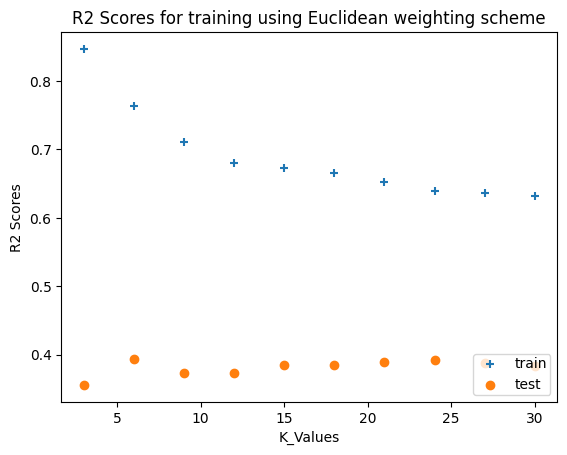

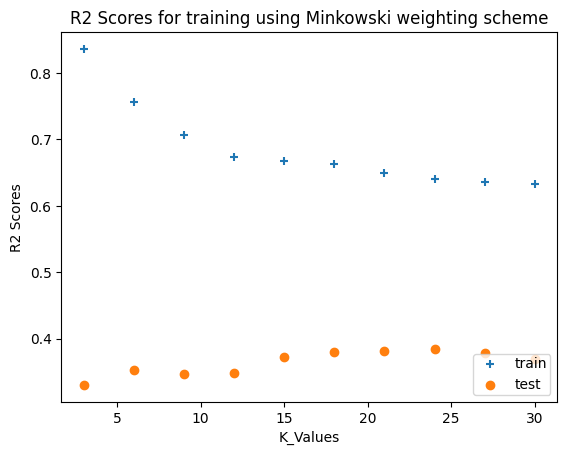

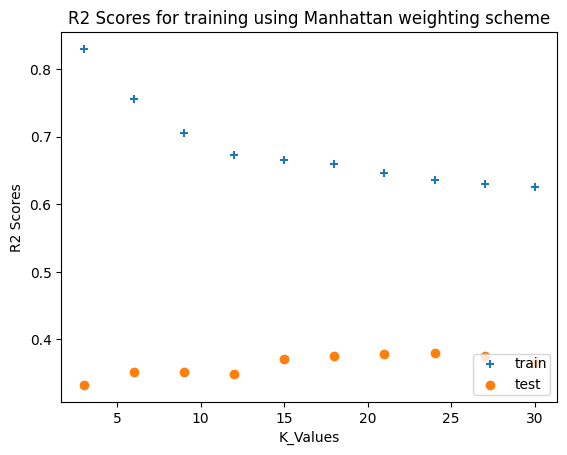

In [4]:
# Compare the r2 scores of the models
for i in range(len(p_values)):        
    plt.title("R2 Scores for training using "+ weighting_scheme_names[i] + " weighting scheme")
    plt.scatter(k_values,list_of_r2_scores_train[i],marker="+")
    plt.scatter(k_values,list_of_r2_scores_test[i],marker="o")
    legend_labels = ["train","test"]
    plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
    plt.xlabel("K_Values")
    plt.ylabel("R2 Scores")
    plt.show()        

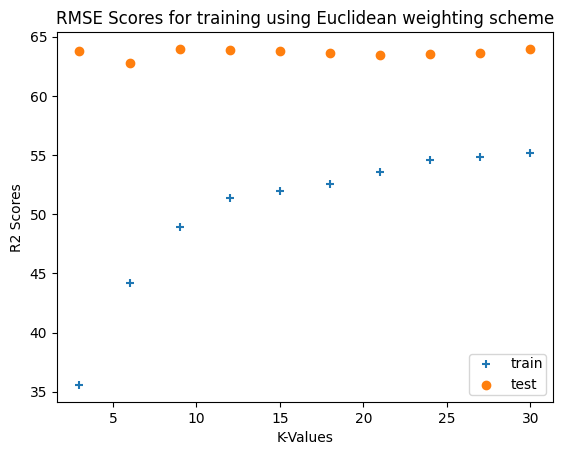

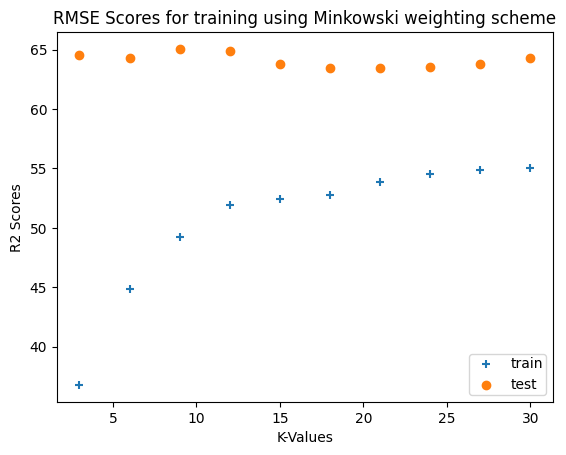

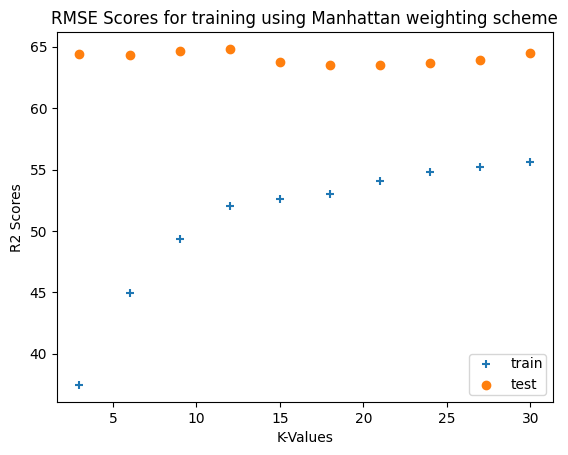

In [5]:
# Compare the rmse scores of the models
for i in range(len(p_values)):        
    plt.title("RMSE Scores for training using "+ weighting_scheme_names[i] + " weighting scheme")
    plt.scatter(k_values,list_of_rmse_scores_train[i],marker="+")
    plt.scatter(k_values,list_of_rmse_scores_test[i],marker="o")
    legend_labels = ["train","test"]
    plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
    plt.xlabel("K-Values")
    plt.ylabel("R2 Scores")
    plt.show()        

Hyperparameter values: k-neighbours = 3 weighting scheme = 1.5


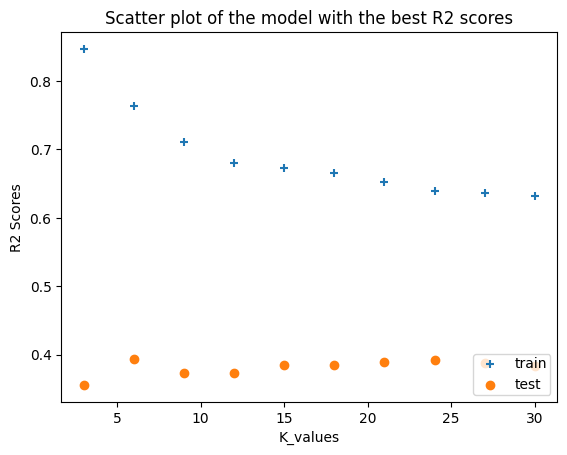

Hyperparameter values: k_values = 3 weighting scheme = 1


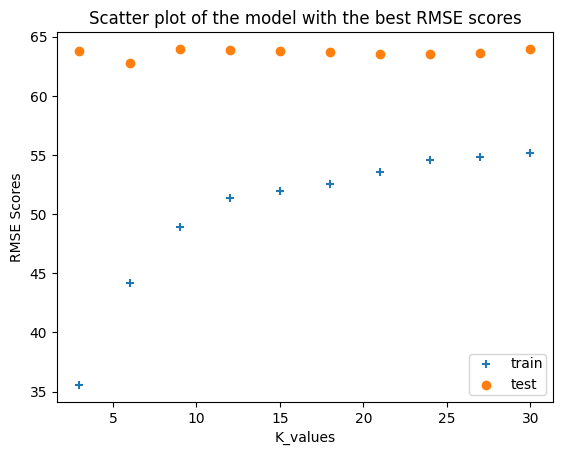

In [6]:
# Finding the model with lowest RMSE and highest R2 for test these models would fit the unseen data the best
plt.title("Scatter plot of the model with the best R2 scores")
# find highest r2 value across the average of 10 folds for this machine model for training data
np_array = np.array(list_of_r2_scores_train)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
plt.scatter(k_values,list_of_r2_scores_train[max_index[0]],marker="+")
# find highest r2 value across the average of 10 folds for this machine model for test data
np_array = np.array(list_of_r2_scores_test)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
plt.scatter(k_values,list_of_r2_scores_test[max_index[0]],marker="o")
print("Hyperparameter values: k-neighbours =",k_values[max_index[0]],"weighting scheme =",p_values[max_index[1]]) 
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("K_values")
plt.ylabel("R2 Scores")
plt.show()

plt.title("Scatter plot of the model with the best RMSE scores")
# find lowest rmse value across the average of 10 folds for this machine model training data
np_array = np.array(list_of_rmse_scores_train)
lowest_index = np.unravel_index(np_array.argmin(), np_array.shape)
plt.scatter(k_values,list_of_rmse_scores_train[max_index[0]],marker="+")
# find lowest rmse value across the average of 10 folds for this machine model test data
np_array = np.array(list_of_rmse_scores_test)
max_index = np.unravel_index(np_array.argmin(), np_array.shape)
plt.scatter(k_values,list_of_rmse_scores_test[max_index[0]],marker="o")
print("Hyperparameter values: k_values =",k_values[lowest_index[0]],"weighting scheme =",p_values[lowest_index[1]]) 

legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("K_values")
plt.ylabel("RMSE Scores")
plt.show()
